In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import datetime

In [3]:
batch_size = 16
input_dim = 28

units = 42
output_size = 10

# Build the RNN model
def build_model():
    lstm_layer = keras.layers.RNN(
        keras.layers.LSTMCell(units), input_shape=(None, input_dim)
    )
    model = keras.models.Sequential(
        [
            lstm_layer,
            keras.layers.BatchNormalization(),
            keras.layers.Dense(output_size),
        ]
    )
    return model

In [4]:
mnist = keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

4431872/4422102 [==============================] - 1s 0us/step


In [6]:
%load_ext tensorboard

model = build_model()
display(model.summary())

model.compile(
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    optimizer="sgd",
    metrics=["accuracy"],
)

log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)

model.fit(
    x_train, y_train, validation_data=(x_test, y_test), batch_size=batch_size, epochs=5, callbacks=[tensorboard_callback]
)


The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rnn (RNN)                   (None, 42)                11928     
                                                                 
 batch_normalization (BatchN  (None, 42)               168       
 ormalization)                                                   
                                                                 
 dense (Dense)               (None, 10)                430       
                                                                 
Total params: 12,526
Trainable params: 12,442
Non-trainable params: 84
_________________________________________________________________


2021-11-06 10:10:44.087605: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-06 10:10:44.297184: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-06 10:10:44.297791: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:939] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2021-11-06 10:10:44.302211: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags

None

2021-11-06 10:10:45.411399: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2021-11-06 10:10:45.696458: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
3750/3750 [==============================] - 120s 31ms/step - loss: 0.7612 - accuracy: 0.7265 - val_loss: 0.6195 - val_accuracy: 0.7780
Epoch 2/5
3750/3750 [==============================] - 115s 31ms/step - loss: 0.5467 - accuracy: 0.8038 - val_loss: 0.5203 - val_accuracy: 0.8114
Epoch 3/5
3750/3750 [==============================] - 129s 35ms/step - loss: 0.4868 - accuracy: 0.8264 - val_loss: 0.4870 - val_accuracy: 0.8223
Epoch 4/5
3750/3750 [==============================] - 129s 34ms/step - loss: 0.4572 - accuracy: 0.8371 - val_loss: 0.4563 - val_accuracy: 0.8358
Epoch 5/5
3750/3750 [==============================] - 154s 41ms/step - loss: 0.4380 - accuracy: 0.8438 - val_loss: 0.4172 - val_accuracy: 0.8490


(28, 28)
Predicted result is: [8], target result is: 8


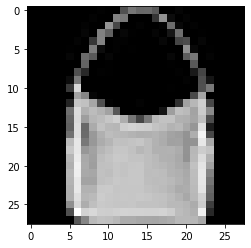

In [7]:
sample_idx = 34
sample, sample_label = x_test[sample_idx], y_test[sample_idx]
print(sample.shape)

result = tf.argmax(model.predict_on_batch(tf.expand_dims(sample, 0)), axis=1)
print(
    "Predicted result is: %s, target result is: %s" % (result.numpy(), sample_label)
)
plt.imshow(sample, cmap=plt.get_cmap("gray"))

plt.show()